# Session 3 Pandas and DataFrames

This notebook provides a brief introduction to [Pandas](https://pandas.pydata.org/docs/index.html). Pandas is a package for data analysis and manipulation. It organises data in tabular form in a structure called a Pandas `Series` (for 1D data) or a `DataFrame` (for tabular data). Before looking at this, let's define some data in the form of two lists (containing respectively the maximum precipitation events, for a list of years).

In [35]:
event_list = [150, 78, 30, 143, 56, 211, 90, 77]
year_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

The code cells below show some things you can do with this data when it is available in list format:
1. get the event in the year 2013
2. get the mean precipitation of the data
3. plot the the events over time
4. convert to inches

In [36]:
# 1. get the event in the year 2013
i = year_list.index(2013)
event_list[i]

143

In [37]:
# 2. get the mean precipitation of the data
import numpy as np
np.mean(event_list)

104.375

<BarContainer object of 8 artists>

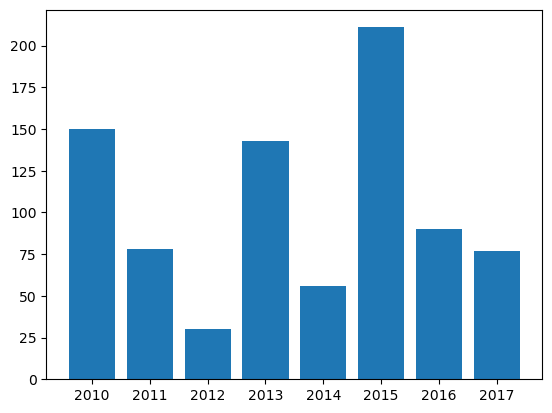

In [38]:
# 3. plot the the events over time
import matplotlib.pyplot as plt
plt.bar(year_list, event_list)

In [39]:
# 4. convert to inches
event_list_inch = []
for e in event_list:
    #convert mm to inch
    e_inch = e * 0.03937
    event_list_inch.append(e_inch)

event_list_inch

[5.9055,
 3.07086,
 1.1811,
 5.629910000000001,
 2.20472,
 8.307070000000001,
 3.5433000000000003,
 3.0314900000000002]

or, using the wonderful technique of list comprehension in Python, as a one-liner

In [40]:
event_list_inch = [e * 0.03937 for e in event_list]

## Pandas Series

The code above used various packages (Numpy, Matplotlib) and Python instructions to accomplish these tasks. If you store the data as a Pandas `Series` then you can do the same things, but with fewer lines of code.

In [41]:
import pandas as pd

s = pd.Series(
    index=year_list,
    data=event_list,
)

s

2010    150
2011     78
2012     30
2013    143
2014     56
2015    211
2016     90
2017     77
dtype: int64

In [42]:
# 1. get the event in the year 2013
s.loc[2013]

143

In [43]:
# 2. get the mean precipitation of the data
s.mean()

104.375

<Axes: >

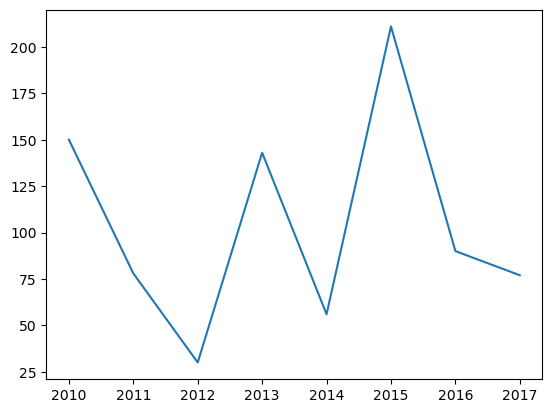

In [44]:
# 3. plot the the events over time
s.plot()

In [45]:
# 4. convert to inches
s_inch = s * 0.03937
s_inch

2010    5.90550
2011    3.07086
2012    1.18110
2013    5.62991
2014    2.20472
2015    8.30707
2016    3.54330
2017    3.03149
dtype: float64

***Exercise 1***: We have a table with the average evaporation per year. Create a pandas `Series` and plot the data as a bar chart (see <A href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html</A>).

| year | evap |
|------|------|
| 2010 | 5.34 |
| 2011 | 6.44 |
| 2012 | 3.22 |
| 2013 | 3.97 |
| 2014 | 2.34 |
| 2015 | 3.23 |
| 2016 | 3.02 |
| 2017 | 2.84 |
| 2018 | 4.65 |
| 2019 | 2.53 |
| 2020 | 3.49 |

<Axes: >

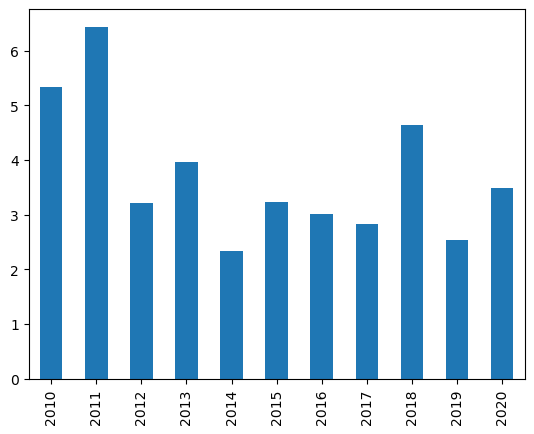

In [46]:
year_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
evap_list = [5.34, 6.44, 3.22, 3.97, 2.34, 3.23, 3.02, 2.84, 4.65, 2.53, 3.49]

# Add your code here
s = pd.Series(data=evap_list, index=year_list)
s.plot(kind='bar')

## Pandas DataFrame

A Pandas Series is basically just one column of data, with its corresponding index. A DataFrame consists of multiple Series and all columns share a common index. In the code cell below, a DataFrame is created with the years serving as the index. There are two data columns, one with the annual rainfall, and the other with the annual evaporation.

In [47]:
year_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
rain_list = [750, 390, 900, 715, 280, 1055, 450, 385]
evap_list = [534.0, 444.0, 322.0, 397.0, 234.0, 323.0, 302.0, 284.0]

df = pd.DataFrame(
    index=year_list,
    data={
       'rain': rain_list,
       'evap': evap_list,
    },
)
df

,rain,evap
2010,750,534.0
2011,390,444.0
2012,900,322.0
2013,715,397.0
2014,280,234.0
2015,1055,323.0
2016,450,302.0
2017,385,284.0


As demonstrated earlier, the plot function provides a quick way to inspect the data.

<Axes: >

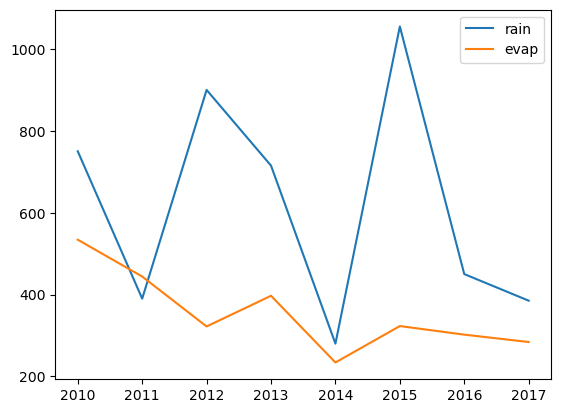

In [48]:
df.plot()

Since the numerical values of precipitation and evaporation differ quite a lot, adding a secondary axis gives a better overview.

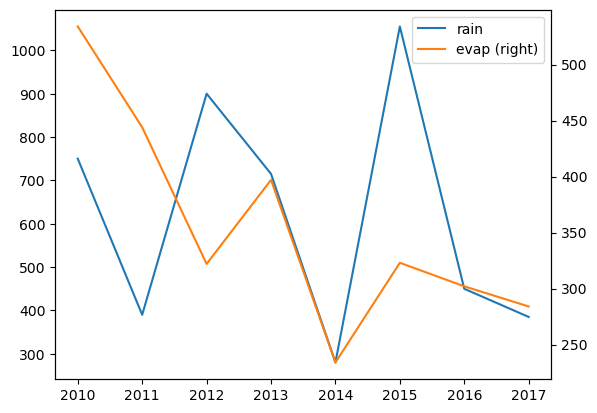

In [49]:
df.plot(secondary_y=["evap"]);

Adding a column is easy. For example, adding the precipitation excess (excess) calculated from the rain and evap columns is done in the following way:

In [50]:
df['excess'] = df['rain'] - df['evap']
df

,rain,evap,excess
2010,750,534.0,216.0
2011,390,444.0,-54.0
2012,900,322.0,578.0
2013,715,397.0,318.0
2014,280,234.0,46.0
2015,1055,323.0,732.0
2016,450,302.0,148.0
2017,385,284.0,101.0


As the above code cell shows, individual columns can be accessed by typing the column name between square brackets that directly follow the DataFrame name. Another way to get a specific column is to use a dot followed by its name

In [51]:
df.excess

2010    216.0
2011    -54.0
2012    578.0
2013    318.0
2014     46.0
2015    732.0
2016    148.0
2017    101.0
Name: excess, dtype: float64

A specific row can be selected using .loc[*x*], where the value of the index for that row should replace the *x* between the square brackets. For example for second last row the index value is 2017 so the statement becomes

In [52]:
df.loc[2017]

rain      385.0
evap      284.0
excess    101.0
Name: 2017, dtype: float64

To get a specific value from a row column pair, both the index value and the column name can be provided

In [53]:
df.loc[2017, "excess"]
# df.at[2017, "excess"]  # same as above, but faster for single values (check with %timeit)


101.0

***Exercise 2***: Modify the code cell below so that you obtain both the evaporation and the rainfall for a row using a single line of code.

In [54]:
# Type your code here
df.loc[2017, ["rain","excess"]]

rain      385.0
excess    101.0
Name: 2017, dtype: float64

Slicing or indexing the DataFrame based on a conditional is also possible. For example, to get only the rows for which the annua; precipitation is larger than 500 mm:

In [55]:
idx = df['rain'] > 500
dfsub = df.loc[idx]
dfsub

,rain,evap,excess
2010,750,534.0,216.0
2012,900,322.0,578.0
2013,715,397.0,318.0
2015,1055,323.0,732.0


### More indexing

Another usefull way to index a DataFrame is by using integers to select an item in a certain row and column in a dataframe.

In [56]:
# First row
df.iloc[0]

rain      750.0
evap      534.0
excess    216.0
Name: 2010, dtype: float64

In [57]:
# First row, first column
df.iloc[0,0]

750

In [58]:
# First two rows, first two columns
df.iloc[:2, :2]

,rain,evap
2010,750,534.0
2011,390,444.0


### Many built-in functionality

Summary statistics are quickly obtained using the `describe` function.

In [59]:
df.describe()

,rain,evap,excess
count,8.000000,8.000000,8.000000
mean,615.625000,355.000000,260.625000
std,279.290395,97.343281,270.296629
min,280.000000,234.000000,-54.000000
25%,388.750000,297.500000,87.250000
50%,582.500000,322.500000,182.000000
75%,787.500000,408.750000,383.000000
max,1055.000000,534.000000,732.000000


Sorting the data by the column values can be done by:

In [60]:
df.sort_values(by='rain', ascending=False)

,rain,evap,excess
2015,1055,323.0,732.0
2012,900,322.0,578.0
2010,750,534.0,216.0
2013,715,397.0,318.0
2016,450,302.0,148.0
2011,390,444.0,-54.0
2017,385,284.0,101.0
2014,280,234.0,46.0


Saving the DataFrame to an Excel file is easy using the `to_excel` function.

In [61]:
df.to_excel("hwb.xlsx")

Importing the data from Excel is also easy (using the `read_excel` function). We'll explore these in later sessions in more detail.

## Data types

The data used above could just as well have been handled by an array because it only involved numbers. In a DataFrame, it is possible to have mulitple data types. In the example below, containing data of groundwater recharge, one of the recharge fluxes is a string. This is a very simplistic example, but it may occur importing data from a file (for which Pandas offers many options).

In [62]:
new_s = pd.Series(
    data=[150, 155, 164, 174, 183, 189, 192, '192'],
    index=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
)
new_s

2010    150
2011    155
2012    164
2013    174
2014    183
2015    189
2016    192
2017    192
dtype: object

In [63]:
# Check the datatypes of the series
new_s.dtypes

dtype('O')

Converting the recharge to inches will result in a `TypeError` because a string can't be multiplied by a floating point number.

In [64]:
new_s * 0.03937

TypeError: can't multiply sequence by non-int of type 'float'

A way to avoid this is to try and convert all data to a number using the `to_numeric` function.

In [65]:
new_s = pd.to_numeric(new_s)
new_s * 0.3937

2010    59.0550
2011    61.0235
2012    64.5668
2013    68.5038
2014    72.0471
2015    74.4093
2016    75.5904
2017    75.5904
dtype: float64

***Exercise 3*** Execute the code cell below and inspect the output. Explain what happens.

In [66]:
new_s = new_s.astype(str)
new_s * 2 # Results in the string being repeated twice

2010    150150
2011    155155
2012    164164
2013    174174
2014    183183
2015    189189
2016    192192
2017    192192
dtype: object